In [18]:
import cv2
import matplotlib.pyplot as mp
import keras
import numpy as np
import sklearn
import os
import glob
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Lambda,Dropout
from keras.layers import Cropping2D , BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.advanced_activations import ELU
from keras.models import load_model
import matplotlib.image as img
from sklearn.model_selection import train_test_split



In [2]:
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import random
print("DATA")
data = []
labels = []
d1 = (glob.glob('/home/janani/Documents/Deep learning  database/carcinoma_in_situ/*.jpg'))
d2 = (glob.glob('/home/janani/Documents/Deep learning  database/light dysplasia/*.jpg'))
d3 = (glob.glob('/home/janani/Documents/Deep learning  database/moderate_dysplastic/*.jpg'))
d4 = (glob.glob('/home/janani/Documents/Deep learning  database/normal_columnar/*.jpg'))
d5 = (glob.glob('/home/janani/Documents/Deep learning  database/normal_intermediate/*.jpg'))
d6 = (glob.glob('/home/janani/Documents/Deep learning  database/normal superficial/*.jpg'))
d7 = (glob.glob('/home/janani/Documents/Deep learning  database/severe_dysplastic/*.jpg'))
#print(len(d1))
#print(len(d2))
#print(len(d3))
#print(len(d4))
#print(len(d5))
#print(len(d6))
#print(len(d7))
for image in d1:
    image = cv2.imread(image)
    
    data.append(image)
    #print(data)
for image in d2:
    image = cv2.imread(image)
    
    data.append(image)
    #print(data)    
for image in d3:
    image = cv2.imread(image)
    
    data.append(image)
    #print(data)
for image in d4:
    image = cv2.imread(image)
    
    data.append(image)
    #print(data)
for image in d5:
    image = cv2.imread(image)
    
    data.append(image)
    #print(data)
for image in d6:
    image = cv2.imread(image)
    data.append(image)
    #print(data)   
for image in d7:
    image = cv2.imread(image)
    data.append(image)
    #print('data',data)    
X_train = np.array(data)    
print(X_train.shape)
         

DATA
(908,)


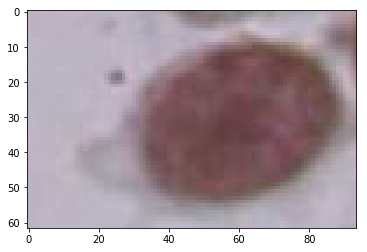

In [3]:
y_d1 = np.array(d1)
y_d1.fill(0)

y_d2 = np.array(d2)
y_d2.fill(1)
y_d3 = np.array(d3)
y_d3.fill(2)
#print(y_d3.shape)

y_d4 = np.array(d4)
y_d4.fill(3)
#print(y_d4.shape)

y_d5 = np.array(d5)
y_d5.fill(4)
#print(y_d5.shape)

y_d6 = np.array(d6)
y_d6.fill(5)
#print(y_d6.shape)

y_d7 = np.array(d7)
y_d7.fill(6)
#print(y_d7.shape)

y_train = np.concatenate((y_d1, y_d2, y_d3, y_d4, y_d5, y_d6, y_d7))
#print(y_train.shape)

mp.imshow(X_train[0])
#print(y_train[0])

shuffle(X_train, y_train)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.1 )
x_valid,x_test,y_valid,y_test = train_test_split(X_test,y_test, test_size=0.2)








In [4]:
print(X_train[0].shape)
print((y_train[0]))
print((x_valid.shape))
print((x_test.shape))
print((y_valid[0]))
print((y_test[0]))
print(len(X_train))
print(len(x_valid))
print(len(x_test))

(169, 228, 3)
1
(72,)
(19,)
0
0
817
72
19


In [5]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as im
import cv2

X_train, y_train = shuffle(X_train, y_train)

gray1 = []
gray2 = []
gray3 = []
for i in X_train:
    image = i
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray1.append(image)
X_train = np.array(gray1)
for i in x_valid:
    image = i
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray2.append(image)
x_valid = np.array(gray2)
for i in x_test:
    image = i
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray3.append(image)
x_test = np.array(gray3)            
    
X_train = (np.subtract((np.divide(X_train,255)),0.5))
x_valid = (np.subtract((np.divide(x_valid,255)),0.5))
x_test = (np.subtract((np.divide(x_test,255)),0.5))

print(X_train.shape)
print(x_valid.shape)


(817,)
(72,)


In [6]:
sz1 = []
sz2 = []
sz3 = []
for j in X_train:
    im = j
    im = cv2.resize(im, dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
    sz1.append(im)
X_train = np.array(sz1)    
print(X_train[149].shape)
for j in x_valid:
    im = j
    im = cv2.resize(im, dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
    sz2.append(im)
x_valid = np.array(sz2)    
print(x_valid[0].shape)
for j in x_test:
    im = j
    im = cv2.resize(im, dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
    sz3.append(im)
x_test = np.array(sz3)    
print(x_test[0].shape)
#print(len(sz1))


(128, 128)
(128, 128)
(128, 128)


In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
keep_prob = tf.placeholder(tf.float32)




from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights1 = tf.Variable(tf.truncated_normal(([5,5,1,6]),0,0.1))
    bias1 = tf.Variable(tf.zeros(6))
    layer1 = tf.nn.conv2d(x,weights1,strides=[1,1,1,1],padding='VALID')
    layer1 = tf.nn.bias_add(layer1,bias1)

    layer1 = tf.nn.relu(layer1)

    layer1 = tf.nn.max_pool(layer1,ksize=[1,2,2,1],strides =[1,2,2,1],padding='VALID')
    
    
    weights2 = tf.Variable(tf.truncated_normal(([5,5,6,16]),0,0.1))
    bias2 = tf.Variable(tf.zeros(16))
    layer2 = tf.nn.conv2d(layer1,weights2,strides=[1,1,1,1],padding='VALID')
    
    layer2 = tf.nn.relu(layer2)
    layer2 = tf.nn.max_pool(layer2,ksize=[1,2,2,1],strides=[1,2,2,1],padding = 'VALID')
   
    layer2 = tf.contrib.layers.flatten(layer2)
    
   
    
    weights3 = tf.Variable(tf.truncated_normal(([13456,120]),0,0.1))
    bias3 = tf.Variable(tf.zeros(120))
    layer3 = tf.add(tf.matmul(layer2,weights3),bias3)
    layer3 = tf.nn.relu(layer3)

    weights4 = tf.Variable(tf.truncated_normal(([120,84]),0,0.1))
    bias4 = tf.Variable(tf.zeros(84))
    layer4 = tf.add(tf.matmul(layer3,weights4),bias4)
    
    layer4 = tf.nn.relu(layer4)

    weights = tf.Variable(tf.truncated_normal(([84,7]),0,0.1))
    bias = tf.Variable(tf.zeros(7))
    logits = tf.add(tf.matmul(layer4,weights),bias)
    return logits

In [8]:
X_train = np.reshape(X_train,[817,128,128,1])
x_valid = np.reshape(x_valid,[72,128,128,1])
x_test = np.reshape(x_test,[19,128,128,1])

In [10]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 16

In [11]:
x = tf.placeholder(tf.float32, (None,128, 128, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 7)

In [12]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
with tf.Session() as sess:

    
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train)

    
    print("Training...")
    print()
   
    for i in range(EPOCHS):
        X_train1, y_train1 = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train1[offset:end], y_train1[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.6})
        X_valid1 , y_valid1 = shuffle(x_valid, y_valid)    
        validation_accuracy = evaluate(X_valid1, y_valid1)
        training_accuracy = evaluate(X_train1, y_train1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './Deep pap')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.306
Training Accuracy = 0.350

EPOCH 2 ...
Validation Accuracy = 0.375
Training Accuracy = 0.448

EPOCH 3 ...
Validation Accuracy = 0.347
Training Accuracy = 0.468

EPOCH 4 ...
Validation Accuracy = 0.431
Training Accuracy = 0.561

EPOCH 5 ...
Validation Accuracy = 0.292
Training Accuracy = 0.559

EPOCH 6 ...
Validation Accuracy = 0.431
Training Accuracy = 0.755

EPOCH 7 ...
Validation Accuracy = 0.417
Training Accuracy = 0.830

EPOCH 8 ...
Validation Accuracy = 0.375
Training Accuracy = 0.880

EPOCH 9 ...
Validation Accuracy = 0.431
Training Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.403
Training Accuracy = 0.969

EPOCH 11 ...
Validation Accuracy = 0.319
Training Accuracy = 0.989

EPOCH 12 ...
Validation Accuracy = 0.347
Training Accuracy = 0.994

EPOCH 13 ...
Validation Accuracy = 0.375
Training Accuracy = 0.993

EPOCH 14 ...
Validation Accuracy = 0.361
Training Accuracy = 0.994

EPOCH 15 ...
Validation Accuracy = 0.361
Tra

In [16]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./Deep pap
Test Accuracy = 0.421


In [21]:
images=[]
image1 = img.imread('/home/janani/Documents/Deep learning  database/test1/20.jpg')
image2 = img.imread('/home/janani/Documents/Deep learning  database/test7/95.jpg')

image1 = cv2.resize(image1,(128,128),interpolation = cv2.INTER_CUBIC)

images.append(image1)
image2 = cv2.resize(image2,(128,128),interpolation = cv2.INTER_CUBIC)

images.append(image2)

image = []
for i in images:
    image1 = cv2.cvtColor(i,cv2.COLOR_RGB2GRAY)
    image.append(image1)
image = np.array(image)
image = np.reshape(image,[2,128,128,1])

image = (np.subtract((np.divide(image,255)),0.5))
softmax = tf.nn.softmax(logits)
argmax =  tf.argmax(softmax,axis=1)
 
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    label = np.array(sess.run(argmax,feed_dict={x:image,keep_prob:1}))
print(label)



INFO:tensorflow:Restoring parameters from ./Deep pap
[0 6]
